<a href="https://colab.research.google.com/github/NbtKmy/gc_workshops/blob/main/Stable_Diffusion2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stable Diffusion pt. 2

Im vorherigen Notebook hatten wir eine sehr simple Anwendung von Stable Diffusion ausprobiert. Aber SD kann natürlich mehr! Wir probieren weitere Möglichkeiten hier aus.

Aber hier zuerst ein kleiner Hinweis - Auf Hugging-Face-Plattform gibt es Dokument für die Library "diffusers". Dort findet man ganz viele Anleitungen & Beispiele. Wenn man weiter machen will, kann man das Dokument konsultiren.
https://huggingface.co/docs/diffusers/index

## Modelle für SD

Es sind unterschiedliche Modelle für SD vorhanden:

| Kategorie | Modell-Name und Link |
|------------|----------------------|
| Stable Diffusion | [runwayml/stable-diffusion-v1-5](https://huggingface.co/runwayml/stable-diffusion-v1-5)
| Stable Diffusion |  [stabilityai/stable-diffusion-2-1](https://huggingface.co/stabilityai/stable-diffusion-2-1)|
| Ghibli Diffusion | [nitrosocke/Ghibli-Diffusion](https://huggingface.co/nitrosocke/Ghibli-Diffusion)|
| Anything Diffusion | [xyn-ai/anything-v4.0](https://huggingface.co/xyn-ai/anything-v4.0) |
| Waifu Diffusion | [hakurei/waifu-diffusion-v1-4](https://huggingface.co/hakurei/waifu-diffusion-v1-4) |
| Realistic Vision | [SG161222/Realistic_Vision_V1.4](https://huggingface.co/SG161222/Realistic_Vision_V1.4)|
| Dream Shaper | [Lykon/DreamShaper](https://huggingface.co/Lykon/DreamShaper)|
| Model Shoot | [wavymulder/modelshoot](https://huggingface.co/wavymulder/modelshoot)|


## Zu Automatic1111

Bei dieser Gelegenheit kurz zu [Automatic1111](https://github.com/AUTOMATIC1111/stable-diffusion-webui). Mit Automatic1111 kann man eine schöne GUI für SD haben und so ganz leicht unterschiedliche Konfigurationen bei der Generierung des Bildes ausprobieren.
Dies konnte man auf (kostenlose) Colab-Notebook haben... bis April 2023.
Seit dem 21. April 2023 ist die Anwendung Colabs als remote UI nicht mehr erlaubt.
[Hier](https://github.com/TheLastBen/fast-stable-diffusion/issues/2013#issuecomment-1516748259) ist die Diskussion darüber ein wenig zu sehen:

Wer zuhause einen PC mit guter Graphickarte hat, kann man Automatic1111 darauf installieren.



In [1]:
!pip install -qU diffusers["torch"] transformers ftfy accelerate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 989.1/989.1 kB 9.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 39.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 251.2/251.2 kB 25.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 27.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 51.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 94.2 MB/s eta 0:00:00


## Unterschiedliche Modelle testen

Weil wir ja schon SD v2.1 vorher ausprobiert haben, schauen wir, wie die anderen Modelle sich verhalten.
Der Prozess belastet GPU-RAM sehr - deshalb testen wir nur ein Modell davon...

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


  0%|          | 0/50 [00:00<?, ?it/s]

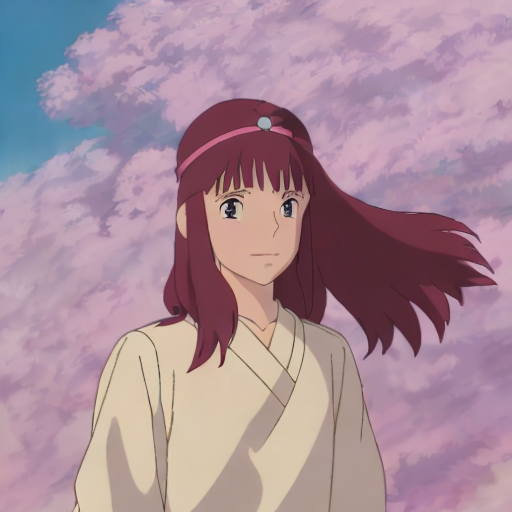

In [2]:
from diffusers import StableDiffusionPipeline
import torch

model_id = "nitrosocke/Ghibli-Diffusion"
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
pipe = pipe.to("cuda")

prompt = "ghibli style magical princess with golden hair"
image_ghibli = pipe(prompt).images[0]

image_ghibli

vae/diffusion_pytorch_model.safetensors not found


Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/clip/feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(


  0%|          | 0/50 [00:00<?, ?it/s]

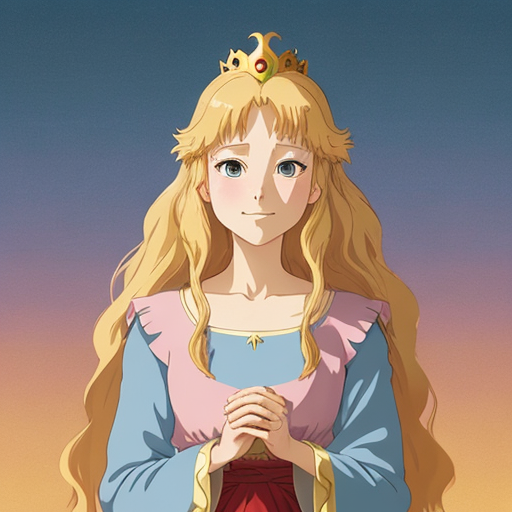

In [3]:
from diffusers import StableDiffusionPipeline
import torch

model_id = "Lykon/DreamShaper"
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
pipe = pipe.to("cuda")

prompt = "ghibli style magical princess with golden hair"
image_dreamShaper = pipe(prompt).images[0]

image_dreamShaper

## Weitere Pipelines - Img2Img

Ausser unterschiedliche Modelle hat SD einige Pipelines, die verschiedene Eingabe erlauben.

__Stable Diffusion Pipeline__
Die Übersicht von Stable Diffusion Pipeline ist [hier](https://huggingface.co/docs/diffusers/v0.20.0/en/api/pipelines/stable_diffusion/overview#stable-diffusion-pipelines).

__Weitere Pipeline__
Es sind noch mehr Pipelines, durch die weitere vielfältige Funktionen hinzugefügt werden können.
Darunter sind zum Beispiel Pipelines für [ControlNet](https://huggingface.co/docs/diffusers/v0.20.0/en/api/pipelines/controlnet) oder [Kandinsky](https://huggingface.co/docs/diffusers/v0.20.0/en/api/pipelines/kandinsky) zu finden.


Unten probieren wir StableDiffusionImg2ImgPipeline aus.


In [5]:
import torch
import requests
from PIL import Image
from io import BytesIO
from diffusers import StableDiffusionImg2ImgPipeline

device = "cuda"
pipe = StableDiffusionImg2ImgPipeline.from_pretrained(
    "nitrosocke/Ghibli-Diffusion", torch_dtype=torch.float16, use_safetensors=True
).to(device)

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


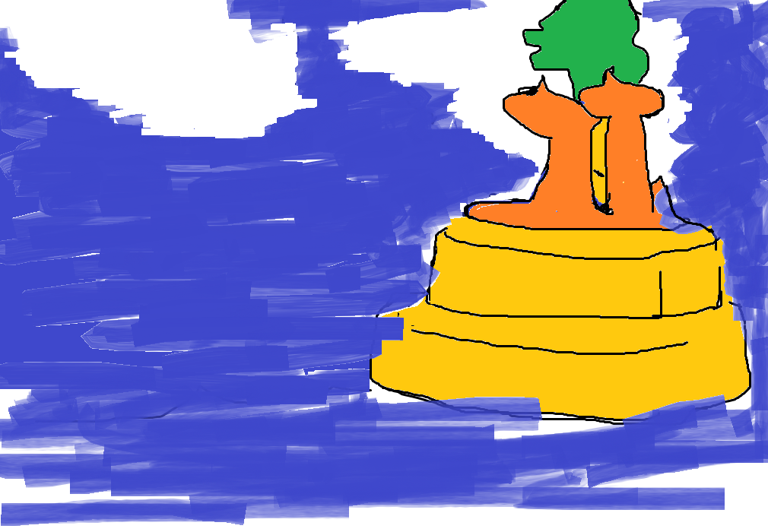

In [6]:
# Bild holen
myArt_image = Image.open("myArtWork.png")
myArt_image.thumbnail((768, 768))
myArt_image

## Argumente

Die möglichen Argumente sind [hier](https://huggingface.co/docs/diffusers/v0.20.0/en/api/pipelines/stable_diffusion/img2img#diffusers.StableDiffusionImg2ImgPipeline.__call__) zu finden.


>__image__ (torch.FloatTensor, PIL.Image.Image, np.ndarray, List[torch.FloatTensor], List[PIL.Image.Image], or List[np.ndarray]) — Image or tensor representing an image batch to be used as the starting point. Can also accept image latents as image, but if passing latents directly it is not encoded again.

> __strength__ (float, optional, defaults to 0.8) — Indicates extent to transform the reference image. Must be between 0 and 1. image is used as a starting point and more noise is added the higher the strength. The number of denoising steps depends on the amount of noise initially added. When strength is 1, added noise is maximum and the denoising process runs for the full number of iterations specified in num_inference_steps. A value of 1 essentially ignores image.

> __guidance_scale__ (float, optional, defaults to 7.5) — A higher guidance scale value encourages the model to generate images closely linked to the text prompt at the expense of lower image quality. Guidance scale is enabled when guidance_scale > 1.

  0%|          | 0/37 [00:00<?, ?it/s]

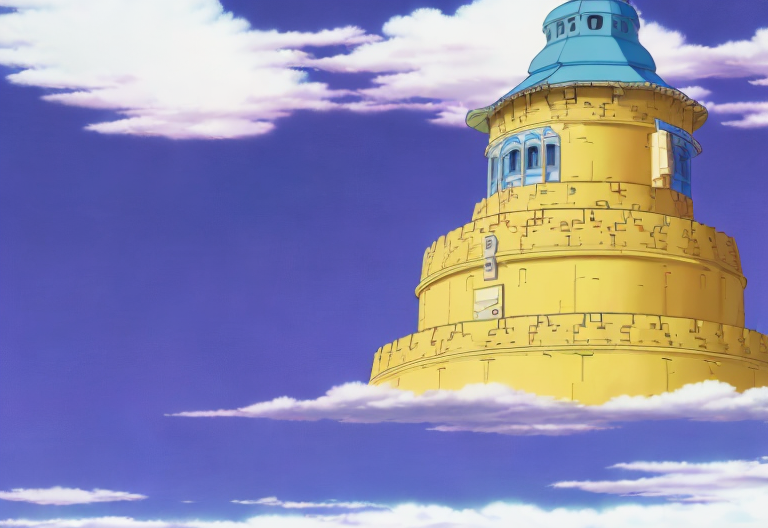

In [8]:
prompt = "ghibli style, a tower of Babel in the sky"
generator = torch.Generator(device=device).manual_seed(1024)
image = pipe(prompt=prompt, image=myArt_image, strength=0.75, guidance_scale=7.5, generator=generator).images[0]
image